In [3]:
import pandas as pd
import cv2
import os
from collections import defaultdict
from sklearn.model_selection import train_test_split
from skimage import feature
import numpy as np
from skimage.filters import gabor


# Define a function to extract Gabor features
def extract_gabor_features(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Define Gabor filter parameters
    frequencies = [0.6, 0.8, 1.0]  # Adjust these values as needed
    theta_values = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # Adjust for different orientations

    # Initialize a list to store Gabor features
    gabor_feature_vector = []

    for freq in frequencies:
        for theta in theta_values:
            # Apply Gabor filter to the grayscale image
            gabor_response = np.abs(gabor(gray_image, frequency=freq, theta=theta)[0])

            # Calculate statistics on the Gabor response, e.g., mean, standard deviation
            gabor_feature_vector.append(np.mean(gabor_response))
            gabor_feature_vector.append(np.std(gabor_response))

    return gabor_feature_vector



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
from collections import defaultdict
image_dir = r'/kaggle/input/palmprint2/Left Hand-20230918T155734Z-001/Left Hand'
import cv2
# List all files in the directory
all_files = os.listdir(image_dir)

# Filter out only the image filenames
image_filenames = [filename for filename in all_files if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]
sorted_image_filenamesL = sorted(image_filenames)
left_label=[int(i[:3]) for i in sorted_image_filenamesL]
left = defaultdict(list)
j=0
for i in left_label:
    image_path = os.path.join(image_dir, sorted_image_filenamesL[j])
    # Load image using cv2
    image = cv2.imread(image_path)
    left[i].append( extract_gabor_features(image))
    j+=1

In [5]:
print(left[1])

[[4.395669791666666, 5.277822960997189, 4.686680208333334, 34.05990331814644, 4.358046875, 4.370378313369381, 4.6832765625, 34.04811479597617, 50.46631614583333, 40.92719604144211, 3.203709895833333, 12.224957169625299, 50.465763020833336, 40.92351115592672, 3.202472916666667, 12.212933100870968, 75.12898645833333, 60.728336526577394, 29.264384375, 23.930658397104803, 75.12898645833333, 60.728336526577394, 29.264450520833332, 23.93183361535143], [4.50430625, 7.189429972620288, 5.521172916666667, 36.89012500034302, 4.378948958333333, 4.636996017032804, 5.524095833333333, 36.90065402276066, 50.59086927083333, 41.33599242620105, 3.3241942708333334, 13.306023450074242, 50.590728125, 41.33204248661886, 3.3312432291666667, 13.372168053235216, 75.315478125, 61.334949887640036, 29.338634895833334, 24.176421318331844, 75.315478125, 61.334949887640036, 29.338596875, 24.17706717441634], [4.3639729166666665, 4.944695049505059, 4.530590625, 33.5025165199869, 4.341319270833333, 4.38844821296296, 4.5

In [6]:
print(len(left[1][0]))

24


In [7]:
from collections import defaultdict
image_dir = r'/kaggle/input/palmprint2/Right Hand-20230918T155917Z-001/Right Hand'
import cv2
# List all files in the directory
all_files = os.listdir(image_dir)

# Filter out only the image filenames
image_filenames = [filename for filename in all_files if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]
sorted_image_filenamesR = sorted(image_filenames)
right_label=[int(i[:3]) for i in sorted_image_filenamesR]
right = defaultdict(list)
j=0
for i in right_label:
    image_path = os.path.join(image_dir, sorted_image_filenamesR[j])
    # Load image using cv2
    image = cv2.imread(image_path)
    right[i].append( extract_gabor_features(image))
    j+=1

Corrupt JPEG data: premature end of data segment


In [8]:
print(len(right[1][0]))

24


## Intra-Class Variability

In [9]:
import numpy as np
#Intra Variability
intra_left=defaultdict(list)
mean_left=defaultdict(list)
mean_right=defaultdict(list)
for i in range(1,231):
    mean_lbp=np.mean(left[i],axis=0)
    mean_left[i]=mean_lbp
    intra_left[i]=[np.linalg.norm(mean_lbp - sample_lbp) for sample_lbp in left[i]]
intra_right=defaultdict(list)
for i in range(1,231):
    mean_lbp=np.mean(right[i],axis=0)
    mean_right[i]=mean_lbp
    intra_right[i]=[np.linalg.norm(mean_lbp - sample_lbp) for sample_lbp in right[i]]

In [10]:
print(intra_left[1])
print(intra_right[1])

[1.661434172581562, 4.177263847243959, 2.4963628256932062, 7.9400624563391515, 3.0225247857475077, 3.506558128565378]
[0.8489598586332958, 5.622456131294365, 1.8993651805850174, 2.353142029044279, 5.669178318077449]


## Inter-Class Variability

In [11]:
from sklearn.metrics.pairwise import euclidean_distances
print("Left Hand - Mean Inter-class Distance:", np.mean(euclidean_distances(list(mean_left.values()))))
print("Left Hand - Standard Deviation of Inter-class Distance:", np.std(euclidean_distances(list(mean_left.values()))))
print("\nRight Hand - Mean Inter-class Distance:", np.mean(euclidean_distances(list(mean_right.values()))))
print("Right Hand - Standard Deviation of Inter-class Distance:", np.std(euclidean_distances(list(mean_right.values()))))

Left Hand - Mean Inter-class Distance: 21.559245066837107
Left Hand - Standard Deviation of Inter-class Distance: 10.599590164663457

Right Hand - Mean Inter-class Distance: 22.355084505661576
Right Hand - Standard Deviation of Inter-class Distance: 11.1307678468817


In [12]:
print(len(mean_left),len(mean_right))
print(mean_left[1])

230 230
[ 4.43268472  5.64264338  4.92910521 34.84868876  4.37935052  4.48642263
  4.92264236 34.82760504 50.6318974  40.56172591  3.23775069 12.4534794
 50.63166328 40.55835909  3.2393546  12.46859608 75.36855573 60.18008196
 29.36185608 23.71956204 75.36855573 60.18008196 29.36206545 23.72056982]


### Checking Inter-Class Variability for a particular person

#### At Threshold_1

In [13]:
checker=mean_left[1]
threshold_1=np.mean((euclidean_distances(list(mean_left.values()))))
k=[]
for i in range(2,231):
   k.append(np.linalg.norm(checker-mean_left[i]))
k<threshold_1

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True, False, False, False,  True,  True, False,  True, False,
       False,  True,

In [14]:
FP_1=len([1 for i in k<threshold_1 if i==True])
TN_1=len([0 for i in k<threshold_1 if i==False])
FPR_1=FP_1/(FP_1+TN_1)
h=[]
for c in range(1,6):
    h.append(abs(np.linalg.norm(left[1][c]-mean_left[1])))
TP_1=len([1 for c in h<threshold_1 if c==True])
FN_1=len([0 for c in h<threshold_1 if c==False])
TPR_1=TP_1/(TP_1+FN_1)
print('False Positive: ',FP_1)
print('True Negative: ',TN_1)
print('True Positive:',TP_1)
print('False Negative:',FN_1)
print('False Positive Rate: ',FPR_1)
print('True Positive Rate:',TPR_1)

False Positive:  163
True Negative:  66
True Positive: 5
False Negative: 0
False Positive Rate:  0.7117903930131004
True Positive Rate: 1.0


In [15]:
threshold_1

21.559245066837107

In [16]:
threshold_array = np.arange(threshold_1, 0, -0.5)
FPR=[]
TPR=[]
for i in threshold_array:
    k=[]
    h=[]
    for j in range(2,231):
        k.append(abs(np.linalg.norm(checker-mean_left[j])))
    for c in range(1,6):
        h.append(abs(np.linalg.norm(left[1][c]-mean_left[1])))    
    FP=len([1 for c in k<i if c==True])
    TN=len([0 for c in k<i if c==False])
    TP=len([1 for c in h<i if c==True])
    FN=len([0 for c in h<i if c==False])
    FPR.append(FP/(FP+TN))
    TPR.append(TP/(TP+FN))

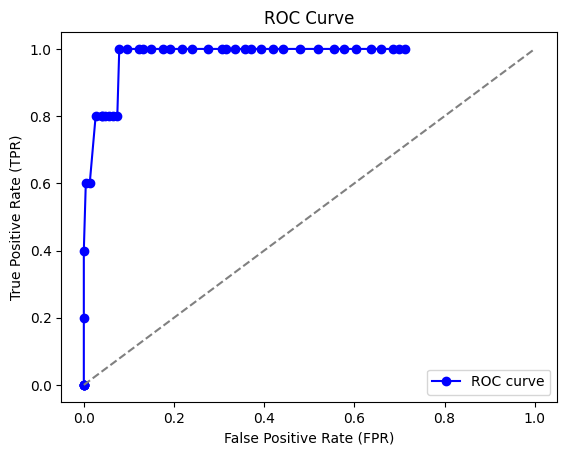

In [17]:
import matplotlib.pyplot as plt

# Hypothetical TPR and FPR values for different thresholds
# Replace these with actual values from your model
#thresholds = [0.01959017974191824, 0.019, 0.0185, 0.018, 0.0175]  # Example threshold values
#tpr_values = tpr  # Example TPR values corresponding to the thresholds
#fpr_values = fpr  # Example FPR values corresponding to the thresholds

# Plot ROC curve
plt.plot(FPR, TPR, color='b', marker='o', label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()
